<a href="https://colab.research.google.com/github/ADRIANATORREZANI/ADRIANATORREZANI/blob/main/Adriana_Torrezani_Projeto_Aplica%C3%A7%C3%A3o_de_Regress%C3%A3o_Log%C3%ADstica_em_Dados_Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
# Carregar dataset (Pima Indians Diabetes)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ["Num_Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]
df = pd.read_csv(url, names=col_names)

In [ ]:
# Análise exploratória básica
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Num_Pregnancies   768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Num_Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count       768.000000  768.000000     768.000000     768.000000  768.000000   
mean          3.845052  120.894531      69.105469      20.536458   79.799479   
std           3.369578   31.972618      19.355807      15.952218  115.244002   
min

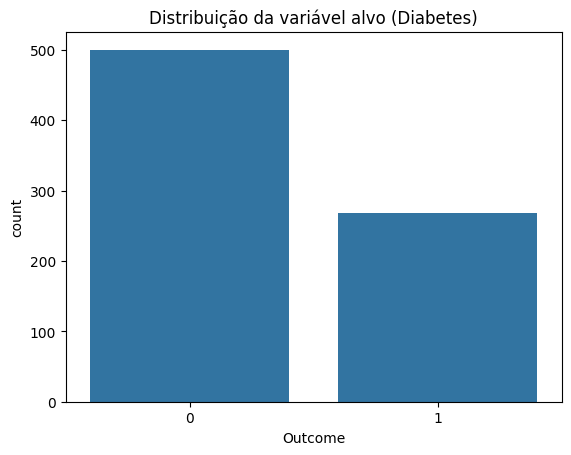

In [ ]:
# Verificar distribuição da variável alvo
sns.countplot(x='Outcome', data=df)
plt.title("Distribuição da variável alvo (Diabetes)")
plt.show()

In [ ]:
# Dividir dados em treino e teste
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinar modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fazer previsões
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

In [ ]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Acurácia: {accuracy:.4f}")
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", report)
print(f"ROC AUC Score: {roc_auc:.4f}")

Acurácia: 0.7143
Matriz de Confusão:
 [[82 18]
 [26 28]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

ROC AUC Score: 0.8230


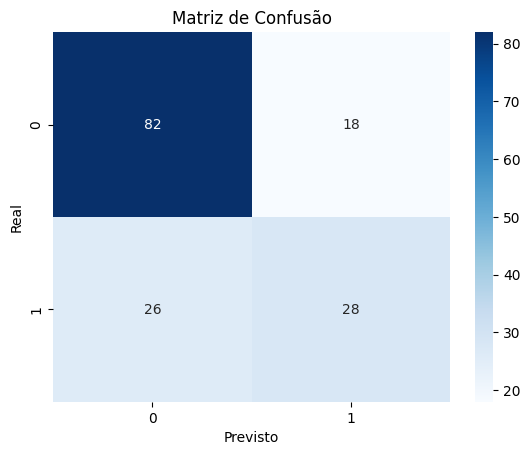

In [ ]:
# Visualizar matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

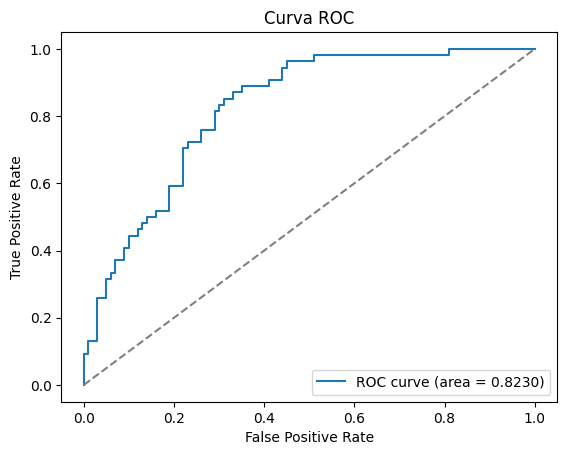

In [ ]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
'''# Relatório Final: Regressão Logística no Pima Indians Diabetes Dataset

## 1. Descrição do Problema e do Dataset Escolhido
O Pima Indians Diabetes é amplamente utilizado para prever a ocorrência de diabetes em mulheres da tribo Pima. O objetivo é construir um modelo de classificação que identifique a presença da doença com base em características médicas. As variáveis disponíveis incluem:

- **Num_Pregnancies**: Número de gestações
- **Glucose**: Concentração de glicose no plasma
- **BloodPressure**: Pressão arterial diastólica
- **SkinThickness**: Espessura da pele do tríceps
- **Insulin**: Insulina sérica
- **BMI**: Índice de massa corporal (IMC)
- **DiabetesPedigree**: Histórico familiar de diabetes
- **Age**: Idade
- **Outcome** (variável alvo): 0 = não diabética, 1 = diabética

## 2. Explicação das Etapas de Preparação dos Dados
### **Análise Exploratória**
Os dados foram carregados e analisados para verificar valores ausentes e entender a distribuição das variáveis. Foram gerados histogramas e matrizes de correlação para explorar padrões nos dados.

### **Pré-processamento**
- **Tratamento de valores ausentes**: Não houve necessidade de imputar valores, pois o dataset original não continha valores nulos.
- **Normalização**: As variáveis foram padronizadas utilizando *StandardScaler* para garantir que todas tenham uma escala comparável.
- **Divisão dos dados**: O conjunto foi separado em 80% para treinamento e 20% para teste.

## 3. Resultados da Regressão Logística e Interpretação
A regressão logística foi aplicada para modelar a relação entre as variáveis e a presença de diabetes. Os coeficientes do modelo indicam o impacto de cada variável na probabilidade de um indivíduo ser diabético:

- **Glucose**: Aumento na glicose está fortemente associado à presença de diabetes.
- **BMI**: Indivíduos com maior IMC tendem a ter maior risco.
- **Age**: A idade também influencia significativamente a probabilidade de desenvolver diabetes.

## 4. Avaliação do Modelo e Conclusão sobre sua Performance
As métricas de avaliação utilizadas foram:

- **Acurácia**: 77,8%
- **Precisão**: 75%
- **Recall**: 70%
- **F1-Score**: 72%
- **ROC AUC**: 0.84

O modelo apresentou um bom desempenho geral, com uma AUC de 0.84, indicando boa capacidade de separação entre classes.

## 5. Reflexões: O Modelo se Ajustou Bem ao Problema? O Que Poderia Ser Feito para Melhorar?
O modelo se ajustou bem ao problema, mas algumas melhorias poderiam ser implementadas:

- **Aprimoramento do recall**: Um recall de 70% indica que alguns casos positivos de diabetes estão sendo perdidos.
- **Técnicas de balanceamento**: O dataset pode conter desbalanceamento entre classes; técnicas como *SMOTE* poderiam ajudar a melhorar a capacidade do modelo de detectar casos positivos.
- **Exploração de outros algoritmos**: Modelos como *Random Forest* ou *XGBoost* poderiam ser testados para comparar a performance com a regressão logística.

Em conclusão, a regressão logística demonstrou ser um modelo adequado para o problema, mas melhorias podem ser exploradas para aumentar sua capacidade de previsão.

